In [3]:
import pandas as pd
from IPython.display import display
red_wine=pd.read_csv('red-wine.csv')
df_train=red_wine.sample(frac=0.7,random_state=0)
df_valid=red_wine.drop(df_train.index)
display(df_train.head(4))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [5]:
#scale 0-1
max_=df_train.max(axis=0)
min_=df_train.min(axis=0)
df_train=(df_train-min_)/(max_-min_)
df_valid=(df_valid-min_)/(max_-min_)


In [6]:
#split f and t
X_train = df_train.drop('quality', axis=1)
#print(X_train)
X_valid = df_valid.drop('quality', axis=1)
#print(X_valid)
y_train = df_train['quality']
#print(y_train)
y_valid = df_valid['quality']
#print(y_valid)
print(X_train.shape)

(1119, 11)


In [7]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [8]:
model.compile(
    optimizer='sgd',
    loss='mse',
)

In [10]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100
)

Epoch 1/100
5/5 [==============================] - 0s 82ms/step - loss: 0.0248 - val_loss: 0.0259
Epoch 2/100
5/5 [==============================] - 0s 47ms/step - loss: 0.0246 - val_loss: 0.0257
Epoch 3/100
5/5 [==============================] - 0s 59ms/step - loss: 0.0245 - val_loss: 0.0255
Epoch 4/100
5/5 [==============================] - 0s 50ms/step - loss: 0.0243 - val_loss: 0.0253
Epoch 5/100
5/5 [==============================] - 0s 47ms/step - loss: 0.0242 - val_loss: 0.0252
Epoch 6/100
5/5 [==============================] - 0s 51ms/step - loss: 0.0241 - val_loss: 0.0251
Epoch 7/100
5/5 [==============================] - 0s 35ms/step - loss: 0.0240 - val_loss: 0.0249
Epoch 8/100
5/5 [==============================] - 0s 31ms/step - loss: 0.0239 - val_loss: 0.0248
Epoch 9/100
5/5 [==============================] - 0s 34ms/step - loss: 0.0238 - val_loss: 0.0247
Epoch 10/100
5/5 [==============================] - 0s 32ms/step - loss: 0.0238 - val_loss: 0.0246
Epoch 11/100
5/5 [=

<Axes: >

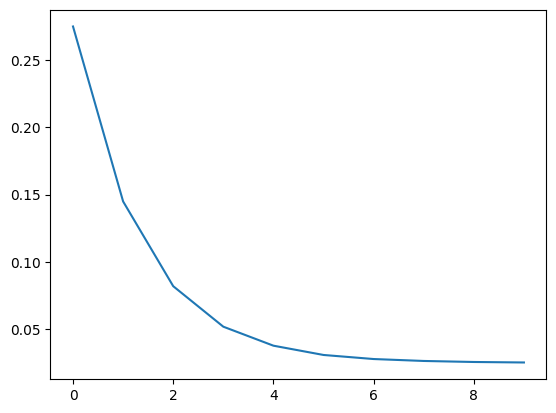

In [ ]:
history_df=pd.DataFrame(history.history)
history_df['loss'].plot()